In [1]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

2024-04-20 16:16:06.839082: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 16:16:06.868908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(228,228,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)), 
    keras.layers.Flatten(),
    keras.layers.Dense(2048,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2048,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6,activation='softmax')  
])

In [3]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024      
 chNormalization)                                                
                                                        

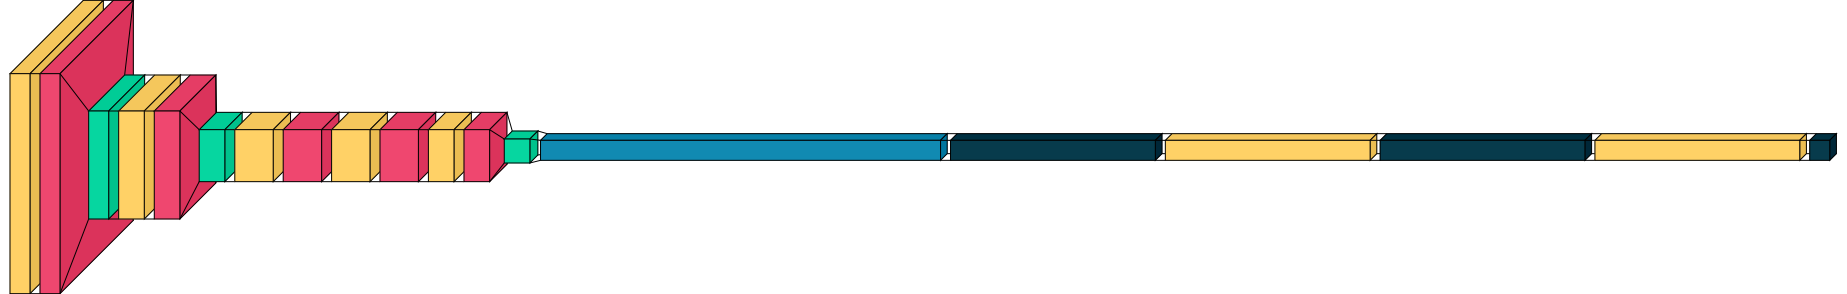

In [5]:
import visualkeras
visualkeras.layered_view(model)

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import time
from PIL import Image
from pathlib import Path
import os.path

In [7]:
image_dir = Path('./fruits/')

In [8]:
filepath = list(image_dir.glob(r'**/*.jpg'))

In [9]:
label = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

In [10]:
filepath = pd.Series(filepath, name='Filepath').astype(str)
label = pd.Series(label, name='Label')
image_df = pd.concat([filepath, label], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

image_df.head()

,Filepath,Label
0,fruits/Apple/IMG20200728181134.jpg,Apple
1,fruits/Orange/IMG_20190924_153401_1.jpg,Orange
2,fruits/Apple/IMG_20190910_172702_1.jpg,Apple
3,fruits/Pomegranate/IMG20200728125119_01_26956.jpg,Pomegranate
4,fruits/Apple/IMG_20190910_172155_1.jpg,Apple


In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse_output=False)
labeln = ohe.fit_transform(image_df['Label'].values.reshape(-1,1))
labeln = tuple(map(tuple, labeln))

In [12]:
ohe.categories_

[array(['Apple', 'Banana', 'Guava', 'Lime', 'Orange', 'Pomegranate'],
       dtype=object)]

In [13]:
image_df['labeln'] = labeln

In [14]:
image_df['Label'].value_counts()

Orange         1987
Apple          1970
Lime           1858
Pomegranate    1818
Guava          1636
Banana         1116
Name: Label, dtype: int64

In [15]:
for i in range(10385):
    image_df['labeln'][i] = tuple(image_df['labeln'][i])

In [16]:
type(image_df.labeln.values[1])

tuple

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(image_df, test_size = 0.2,random_state = 33, shuffle=True)

In [18]:
train_df['labeln']

4490    (0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
390     (0.0, 0.0, 1.0, 0.0, 0.0, 0.0)
2211    (1.0, 0.0, 0.0, 0.0, 0.0, 0.0)
1031    (0.0, 1.0, 0.0, 0.0, 0.0, 0.0)
3680    (1.0, 0.0, 0.0, 0.0, 0.0, 0.0)
                     ...              
57      (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
578     (0.0, 1.0, 0.0, 0.0, 0.0, 0.0)
5848    (0.0, 0.0, 0.0, 1.0, 0.0, 0.0)
2439    (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
7188    (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
Name: labeln, Length: 8308, dtype: object

In [19]:
train_df.tail()

,Filepath,Label,labeln
57,fruits/Pomegranate/20190820_154735_26785.jpg,Pomegranate,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
578,fruits/Banana/IMG_20190910_175825.jpg,Banana,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
5848,fruits/Lime/IMG_20190923_183814.jpg,Lime,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
2439,fruits/Pomegranate/20190820_154635(0)_26692.jpg,Pomegranate,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
7188,fruits/Pomegranate/20190820_154532_26596.jpg,Pomegranate,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"


In [20]:
test_df.tail()

,Filepath,Label,labeln
8478,fruits/Pomegranate/IMG20200728182243_27587.jpg,Pomegranate,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
2714,fruits/Pomegranate/20190820_154737.jpg,Pomegranate,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
8700,fruits/Lime/IMG_20190923_183713.jpg,Lime,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
9483,fruits/Pomegranate/IMG20200728181634_27197.jpg,Pomegranate,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
8735,fruits/Guava/20190813_121217.jpg,Guava,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)"


In [21]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # Rescale pixel values to [0,1] range
    rescale=1./255,
    # Fraction of images reserved for validation (25%)
    validation_split=0.25,
    # Range for random rotations (degrees)
    rotation_range=20,
    # Range for random horizontal shifts
    width_shift_range=0.1,
    # Range for random vertical shifts
    height_shift_range=0.2,
    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=0.2,
    # Range for random zoom
    zoom_range=0.2,
    # Randomly flip inputs horizontally
    horizontal_flip=True,
    # Strategy for filling in newly created pixels after a rotation or a width/height shift
    fill_mode='nearest'
)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [22]:
train_dataset = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col= 'Label',
    target_size=(228, 228),  # Resize images to input size
    batch_size=48,
    color_mode='rgb',  # RGB color mode
    class_mode='categorical',  # Use categorical labels
    shuffle=True,
    seed=42,
    subset='training'  # Subset for training
)

Found 6231 validated image filenames belonging to 6 classes.


In [23]:
train_dataset

In [24]:
train_df['labeln'].value_counts()

(0.0, 0.0, 0.0, 0.0, 1.0, 0.0)    1594
(1.0, 0.0, 0.0, 0.0, 0.0, 0.0)    1577
(0.0, 0.0, 0.0, 1.0, 0.0, 0.0)    1508
(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)    1443
(0.0, 0.0, 1.0, 0.0, 0.0, 0.0)    1308
(0.0, 1.0, 0.0, 0.0, 0.0, 0.0)     878
Name: labeln, dtype: int64

In [25]:
validation_dataset = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(228, 228),
    batch_size=48,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='validation'  # Subset for validation
)

test_dataset = test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(228, 228),
    batch_size=48,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False  # No shuffling for test dataset
)

Found 2077 validated image filenames belonging to 6 classes.
Found 2077 validated image filenames belonging to 6 classes.


In [26]:
checkpoint_path = "./check_point/models.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)
model.save_weights(checkpoint_path.format(epoch=0))

In [27]:
#original training cell
cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=2, save_weights_only=True,
   save_freq='epoch',save_best_only=True, monitor='val_accuracy'
)


model.load_weights('./check_point/models.keras')
history = model.fit(train_dataset,
    epochs = 20, callbacks = [cp_callback],
    validation_data = validation_dataset,
    validation_freq=1, verbose=1
    )

Epoch 1/20
130/130 [==============================] - ETA: 0s - loss: 3.1959 - accuracy: 0.5328
Epoch 1: val_accuracy improved from -inf to 0.26384, saving model to ./check_point/models.keras
130/130 [==============================] - 255s 2s/step - loss: 3.1959 - accuracy: 0.5328 - val_loss: 2.4421 - val_accuracy: 0.2638
Epoch 2/20
130/130 [==============================] - ETA: 0s - loss: 0.9134 - accuracy: 0.6972
Epoch 2: val_accuracy improved from 0.26384 to 0.30669, saving model to ./check_point/models.keras
130/130 [==============================] - 267s 2s/step - loss: 0.9134 - accuracy: 0.6972 - val_loss: 2.2740 - val_accuracy: 0.3067
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.7222 - accuracy: 0.7562
Epoch 3: val_accuracy improved from 0.30669 to 0.69283, saving model to ./check_point/models.keras
130/130 [==============================] - 269s 2s/step - loss: 0.7222 - accuracy: 0.7562 - val_loss: 0.9334 - val_accuracy: 0.6928
Epoch 4/20
130/130 [==

In [28]:
model.load_weights('./check_point/models.keras')
model.save('./final_model/model.keras')

Text(0.5, 1.0, 'Training and Validation Accuracy')

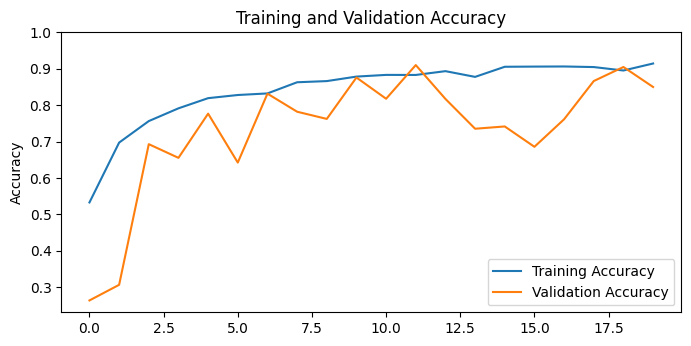

In [29]:
#execute only to study accuracy wrt epoch during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

In [ ]:
#somewhat convergence of training and validation accuracy,less overfitting towards the end

In [30]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

44/44 [==============================] - 65s 1s/step - loss: 0.1982 - accuracy: 0.9302
Test accuracy : 0.9301877617835999


1/1 [==============================] - 0s 56ms/step
[[0. 0. 0. 0. 0. 1.]]


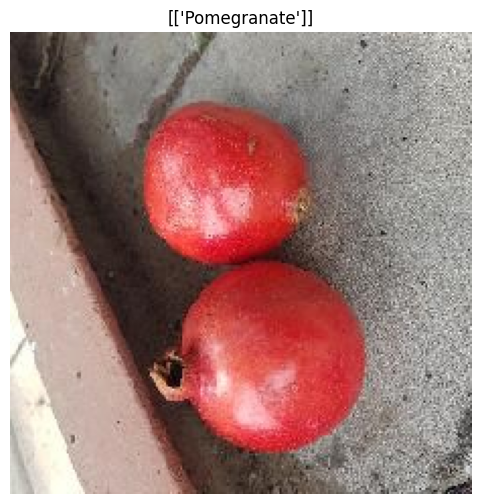

In [38]:
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model

#inferencing images from our model
# image
img_path = './fruits/Pomegranate/20190820_154300_26460.jpg'
img = image.load_img(img_path, target_size=(228, 228), color_mode='rgb')
#img_array = image.img_to_array(img)

# Make predictions
image = keras.utils.array_to_img(img)
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions)
# showing image and prediciton
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(ohe.inverse_transform(predictions))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 54ms/step
[[0. 0. 0. 0. 1. 0.]]


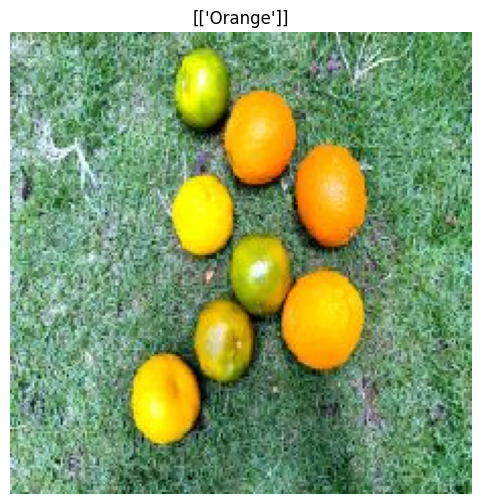

In [42]:
from tensorflow.keras.preprocessing import image
img_path = './fruits/Orange/IMG20200728130818.jpg'
img = image.load_img(img_path, target_size=(228, 228), color_mode='rgb')
#img_array = image.img_to_array(img)

# Make predictions
image = keras.utils.array_to_img(img)
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions)
# showing image and prediciton
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(ohe.inverse_transform(predictions))
plt.axis('off')
plt.show()